# SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Load data

In [10]:
iris = load_iris() 
#['sepal length (cm)','sepal width (cm)','petal width (cm)'] 타겟 외 컬럼
X = iris.data[:,[2,3]]
Y = iris.target

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [13]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined_std = np.hstack((Y_train,Y_test))

## Model - Train

In [16]:
## Linear SVM
model_linear = SVC(kernel="linear").fit(X_train_std,Y_train)
## Polynomial SVM
model_poly = SVC(kernel="poly",random_state=0,gamma=10,C=1).fit(X_train_std,Y_train)
## Gaussian SVM
model_rbf = SVC(kernel="rbf",random_state=0,gamma=1,C=1).fit(X_train_std,Y_train)

## Test

In [17]:
print("Accuracy")
## Linear SVM
Y_pred = model_linear.predict(X_test_std)
accuracy1 = accuracy_score(Y_test,Y_pred)
print(f"Linear SVM : {accuracy1:.3f}")
## Polynomial SVM
Y_pred = model_poly.predict(X_test_std)
accuracy2 = accuracy_score(Y_test,Y_pred)
print(f"Polynomial SVM : {accuracy2:.3f}")
## Gaussian SVM
model3 = model_rbf.predict(X_test_std)
accuracy3 = accuracy_score(Y_test,Y_pred)
print(f"Gaussian SVM : {accuracy3:.3f}")

Accuracy
Linear SVM : 0.978
Polynomial SVM : 0.978
Gaussian SVM : 0.978


## Visualization

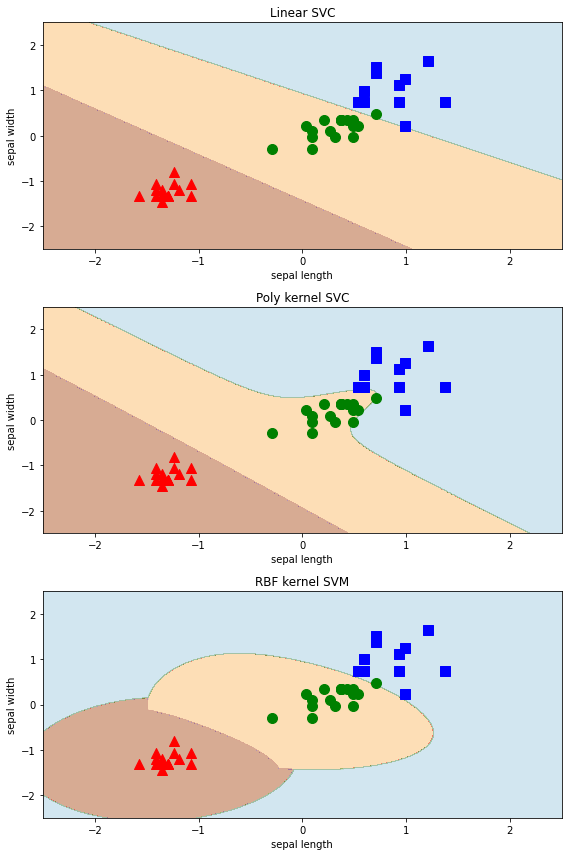

In [19]:
def plot_iris(X,Y,model,title,xmin=-2.5,xmax=2.5, ymin=-2.5,ymax=2.5):
    XX,YY=np.meshgrid(
        np.arange(xmin,xmax,(xmax-xmin)/1000),
        np.arange(ymin,ymax,(ymax-ymin)/1000)
    )
    ZZ=np.reshape(model.predict(np.array([XX.ravel(),YY.ravel()]).T),XX.shape)
    plt.contourf(XX,YY,ZZ,cmap=plt.cm.Paired_r,alpha=0.5)
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[Y == 2, 0], X[Y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title(title)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, Y_test, model_linear, "Linear SVC")
plt.subplot(312)
plot_iris(X_test_std, Y_test, model_poly, "Poly kernel SVC")
plt.subplot(313)
plot_iris(X_test_std, Y_test, model_rbf, "RBF kernel SVM")
plt.tight_layout()
plt.show()

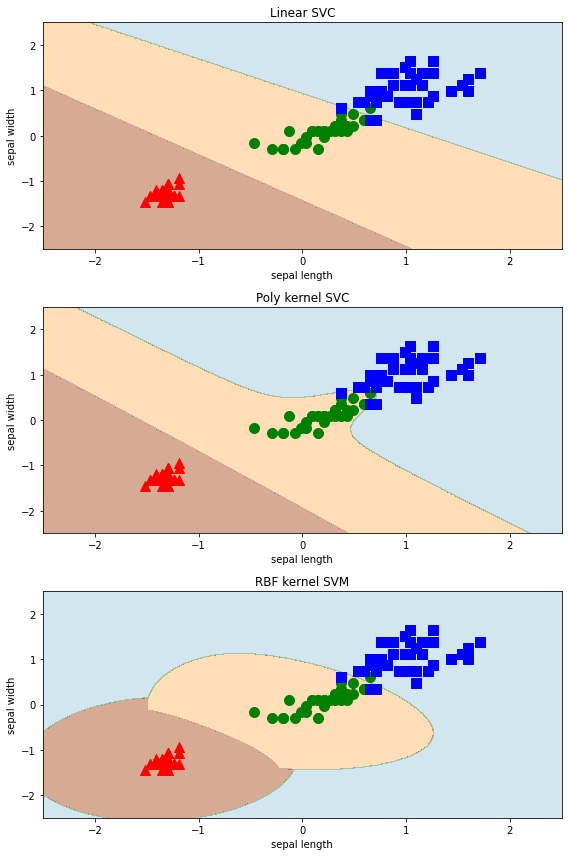

In [20]:
plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_train_std, Y_train, model_linear, "Linear SVC")
plt.subplot(312)
plot_iris(X_train_std, Y_train, model_poly, "Poly kernel SVC")
plt.subplot(313)
plot_iris(X_train_std, Y_train, model_rbf, "RBF kernel SVM")
plt.tight_layout()
plt.show()